Autoencoder

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.image as mpimg

2024-07-13 01:22:28.179064: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 01:22:28.343235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 01:22:28.423069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 01:22:28.423706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 01:22:28.558226: I tensorflow/core/platform/cpu_feature_gua

In [2]:

# Verificar si TensorFlow reconoce la GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow reconoce las siguientes GPU:")
    for gpu in gpus:
        print(f" - {gpu}")
else:
    print("TensorFlow no reconoce ninguna GPU")

TensorFlow reconoce las siguientes GPU:
 - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-07-13 01:22:30.809758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:22:30.936267: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:22:30.936309: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Carga de datos

In [3]:
def leer_jpg_de_subcarpetas(carpeta_principal):
    # Obtener todas las rutas de archivos .jpg en todas las subcarpetas
    rutas_jpg = glob.glob(os.path.join(carpeta_principal, '**', '*.jpg'), recursive=True)
    
    return rutas_jpg

def load_files(files_list):
    data=[]
    for file_path in files_list:
        img=cv2.imread(file_path,0)
        data.append(img)
    return data

In [4]:
path='/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/Dataset'
jpg_path=leer_jpg_de_subcarpetas(path)
print(len(jpg_path))

9997


In [5]:
data=[]
print(len(jpg_path))
batch_size=len(jpg_path)//13
step=0
for i in range(13):
    data+=load_files(jpg_path[step:batch_size+step])
    step+=batch_size
    print(f"{i+1} bloques leidos")

9997
1 bloques leidos
2 bloques leidos
3 bloques leidos
4 bloques leidos
5 bloques leidos
6 bloques leidos
7 bloques leidos
8 bloques leidos
9 bloques leidos
10 bloques leidos
11 bloques leidos
12 bloques leidos
13 bloques leidos


Exploración de los datos


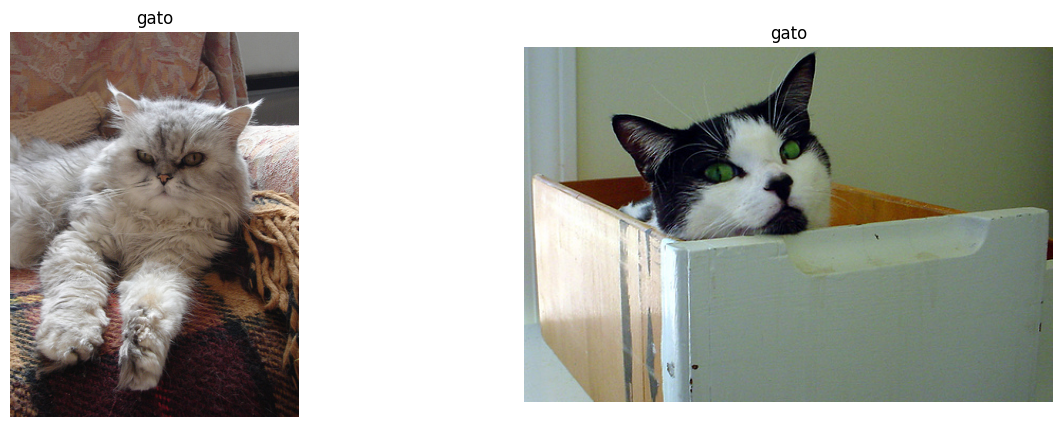

In [6]:
def show_images(image_paths, titles):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Ajustar el tamaño de la figura según el número de imágenes
    for i in range(num_images):
        # Cargar la imagen y convertirla a RGB
        image = cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB)
        # Mostrar la imagen en la subtrama correspondiente
        axes[i].imshow(image)
        axes[i].axis('off')  # Desactivar los ejes
        axes[i].set_title(titles[i])  # Establecer el título de la subtrama
    plt.show()
    
def show_loaded_images(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Ajustar el tamaño de la figura según el número de imágenes
    
    for i in range(num_images):
        # Convertir la imagen de BGR a RGB
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        
        # Mostrar la imagen en la subtrama correspondiente
        axes[i].imshow(image_rgb)
        axes[i].axis('off')  # Desactivar los ejes
        axes[i].set_title(titles[i])  # Establecer el título de la subtrama
    
    plt.show()
image_paths = [jpg_path[0], jpg_path[8000]]
titles = ['gato', 'gato']
show_images(image_paths, titles)

Normalizado de los datos

In [7]:
def shape_fix(img):
    if img.shape[1]<img.shape[0]:
        image=img[0:img.shape[1],0:img.shape[1]]
    elif img.shape[1]>img.shape[0]:
        image=img[0:img.shape[0],0:img.shape[0]]
    else:
        image=img
    return cv2.resize(image,(64,64))

In [8]:
fixed_images=[shape_fix(image) for image in data]

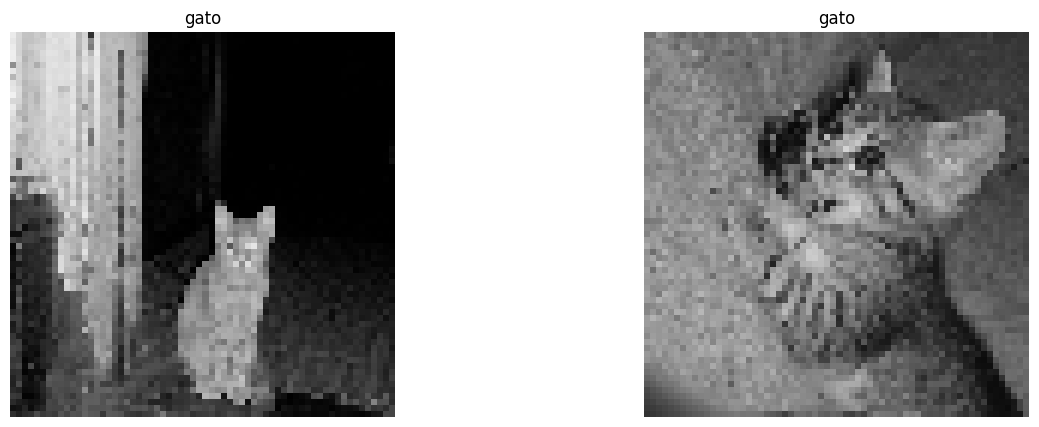

In [9]:
show_loaded_images((fixed_images[400],fixed_images[250]),['gato','gato'])

In [10]:
for image in fixed_images:
    image=tf.convert_to_tensor(image,dtype=tf.float32)
    image=image/255

2024-07-13 01:24:02.298443: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:24:02.298496: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:24:02.298514: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:24:02.397849: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 01:24:02.397898: I external/local_xla/xla/stream_executor

Modelo

In [31]:
#Encoder
input_layer=tf.keras.layers.Input((28,28,3))

X=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=2)(input_layer)
#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=2)(X)
#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',strides=2)(X)
#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu',padding='same',strides=2)(X)

encoder=tf.keras.Model(inputs=input_layer, outputs=X)

tf.keras.utils.plot_model(encoder,to_file='encoder.png', show_shapes=True, dpi=64,show_dtype=False)
Latent_size=(16,16,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/encoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()



ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [121]:
#Quitar input layer

input_layer2=tf.keras.layers.Input(shape=encoder.output_shape[1:])
Y=tf.keras.layers.Conv2DTranspose(48,kernel_size=3,activation='relu',padding='same',strides=2)(input_layer2)
Y=tf.keras.layers.Conv2DTranspose(256,kernel_size=(3,3),activation='relu',padding='same',strides=2)(Y)
y=tf.keras.layers.Dropout(.25)(Y)
Y=tf.keras.layers.Conv2DTranspose(48,kernel_size=3,activation='relu',padding='same',strides=2)(Y)
#Y=tf.keras.layers.Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=2)(Y)
Y=tf.keras.layers.Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same',strides=2)(Y)



decoder=tf.keras.Model(inputs=input_layer2,outputs=Y)

tf.keras.utils.plot_model(decoder,to_file='decoder.png', show_shapes=True, dpi=64,show_dtype=False)
Latent_size=(16,16,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/decoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <Conv2DTranspose name=conv2d_transpose_42, built=False> (of type <class 'keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose'>)

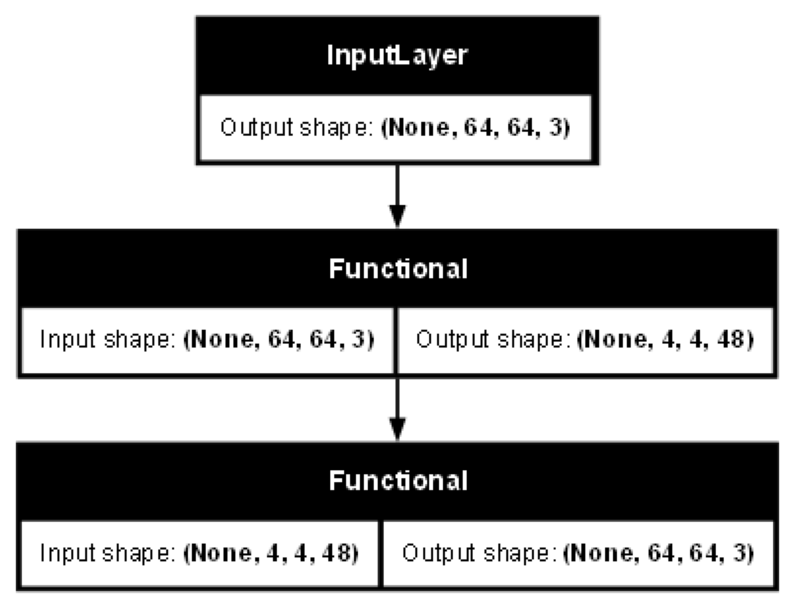

In [111]:
encoded=encoder(input_layer)
decoded=decoder(encoded)
autoencoder=tf.keras.models.Model(input_layer,decoded)
tf.keras.utils.plot_model(autoencoder,to_file='autoencoder.png', show_shapes=True, dpi=64,show_dtype=False)
Latent_size=(16,16,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/autoencoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [112]:
autoencoder.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_47 (Functional)      │ (None, 4, 4, 48)       │       481,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_49 (Functional)      │ (None, 64, 64, 3)      │       243,571 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,027 (2.77 MB)

 Trainable params: 725,027 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
latent_dim = 256 

class Autoencoder(tf.keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64*64, activation='sigmoid'),
      tf.keras.layers.Reshape((64, 64))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#autoencoder = Autoencoder(latent_dim)


autoencoder.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['mse','accuracy'])

Entrenamiento

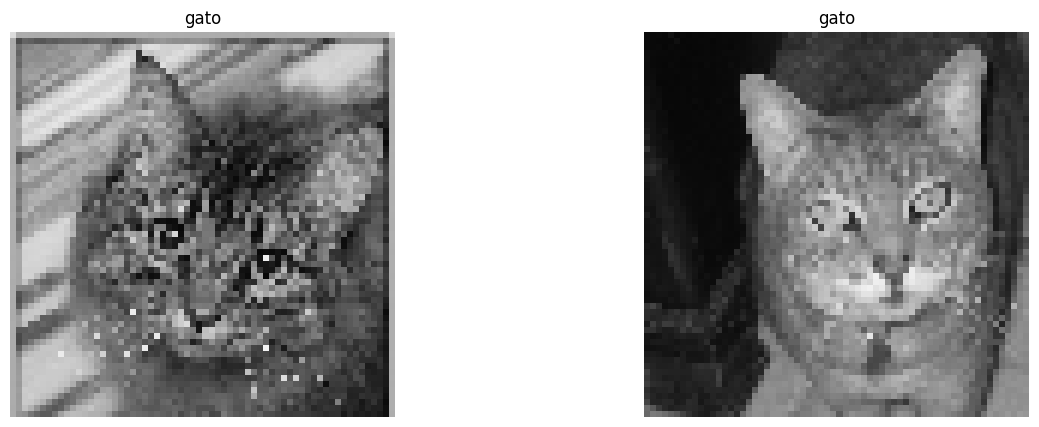

In [12]:
np.random.shuffle(fixed_images)
#print(len(data))
show_loaded_images((fixed_images[0],fixed_images[9000]),['gato','gato'])


In [13]:
X_train,X_test,_,_=train_test_split(fixed_images,fixed_images,test_size=.2,random_state=42)
X_test,X_valid,_,_=train_test_split(X_test,X_test,test_size=.2,random_state=42)

7997
1600
400


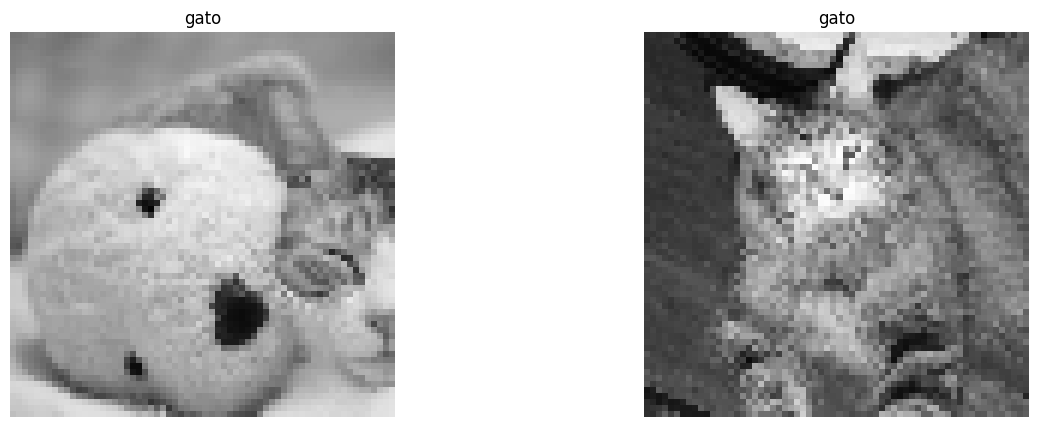

In [14]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))
show_loaded_images((X_train[0],X_test[1500]),['gato','gato'])

In [15]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_valid=np.array(X_valid)

In [16]:
print(X_train[600].shape)

(64, 64)


In [21]:
"""

#LOSS
LAMBDA=100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def autoencoder_loss(aut_enc_generated_output, gen_output, target):
  aut_enc_loss = loss_object(tf.ones_like(aut_enc_generated_output), aut_enc_generated_output)
  return aut_enc_loss

optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5)



@tf.function
def train_step(input_image,step):
    with tf.GradientTape() as aut_enc_tape:
        aut_enc_prediction=Autoencoder(input_image,training=True)
        loss=autoencoder_loss(aut_enc_prediction,input_image)
        autoencoder_gradient=aut_enc_tape.gradient(zip(loss,
                                                       Autoencoder.trainable_variables))
        optimizer.apply_gradients(zip(autoencoder_gradient,
                                      Autoencoder.trainable_variables))
        
        tf.summary.scalar('Loss', loss, step=step//1000)
        
        """

"\n\n#LOSS\nLAMBDA=100\nloss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)\ndef autoencoder_loss(aut_enc_generated_output, gen_output, target):\n  aut_enc_loss = loss_object(tf.ones_like(aut_enc_generated_output), aut_enc_generated_output)\n  return aut_enc_loss\n\noptimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5)\n\n\n\n@tf.function\ndef train_step(input_image,step):\n    with tf.GradientTape() as aut_enc_tape:\n        aut_enc_prediction=Autoencoder(input_image,training=True)\n        loss=autoencoder_loss(aut_enc_prediction,input_image)\n        autoencoder_gradient=aut_enc_tape.gradient(zip(loss,\n                                                       Autoencoder.trainable_variables))\n        optimizer.apply_gradients(zip(autoencoder_gradient,\n                                      Autoencoder.trainable_variables))\n        \n        tf.summary.scalar('Loss', loss, step=step//1000)\n        \n        "

In [22]:
"""
def fit(train,steps):
    for step,input_image in train.repeat(1).take(steps).enumerate():
        train_step(input_image,input_image,step)
        if (step+1) % 10 == 0:
            print('.', end='', flush=True)
"""

"\ndef fit(train,steps):\n    for step,input_image in train.repeat(1).take(steps).enumerate():\n        train_step(input_image,input_image,step)\n        if (step+1) % 10 == 0:\n            print('.', end='', flush=True)\n"

In [23]:
#batch_size=200
#fit(X_train,steps=100)

In [17]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


History= autoencoder.fit(X_train,X_train,epochs=100,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/100


I0000 00:00:1720855462.612432    1325 service.cc:145] XLA service 0x7f6754005550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720855462.612481    1325 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-07-13 01:24:22.644629: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-13 01:24:22.734482: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720855463.240820    1463 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_424', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1720855463.241012    1473 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_424', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:17

156/250 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.0534 - loss: 16916.7090 - mse: 16916.7070

I0000 00:00:1720855463.960019    1325 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/250 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.0542 - loss: 16969.8398 - mse: 16969.8398

I0000 00:00:1720855464.615547    1542 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_424', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720855464.616525    1537 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_424', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720855464.618113    1530 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_424', 40 bytes spill stores, 40 bytes spill loads



250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0543 - loss: 16985.9590 - mse: 16985.9590 - val_accuracy: 0.0520 - val_loss: 16991.5430 - val_mse: 16991.5430
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0589 - loss: 16900.3672 - mse: 16900.3672 - val_accuracy: 0.0535 - val_loss: 16990.2480 - val_mse: 16990.2480
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0563 - loss: 17149.0215 - mse: 17149.0215 - val_accuracy: 0.0535 - val_loss: 16990.2480 - val_mse: 16990.2480
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0564 - loss: 17158.6582 - mse: 17158.6582 - val_accuracy: 0.0535 - val_loss: 16990.1934 - val_mse: 16990.1934
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0580 - loss: 17074.7656 - mse: 17074.7656 - val_accuracy: 0.0535 - val_loss: 16990.1934 - val_mse: 16990.1934
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0538 - loss: 17050.4453 - mse: 17050.4473 - val_accuracy: 0.

In [18]:
print(X_test[1].shape)
val=autoencoder.predict(X_train)


(64, 64)
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


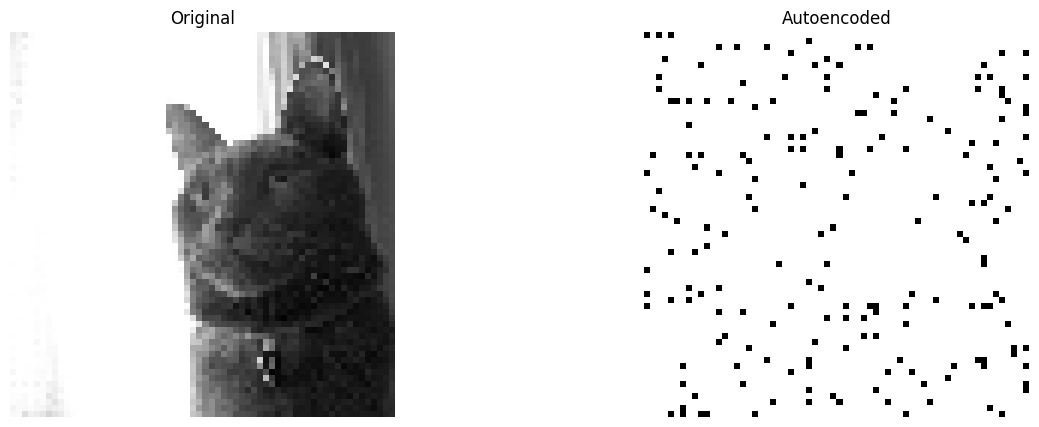

In [30]:
index=int(np.random.uniform(0,6000))
show_loaded_images((X_train[index],val[index]),['Original','Autoencoded'])